# Probabilistic programming + functional programming



## (Lazy, strongly-typed) Functional programming

- purity: all functions are mathematical functions (no hidden side effects, no global state)
- static types: reason about the behavior of your program by looking at its type
- lazy evaluation
- compositionality: meaning of whole program should be a function of the meaning of the parts

In [29]:
f x = (x, not x)
:t f

f :: Bool -> (Bool, Bool)

In [40]:
h :: [Int]
h = 1 : map (+1) h


take 10 h 

[1,2,3,4,5,6,7,8,9,10]

In [44]:
isEven x = x `mod` 2 == 0
evens = foldr1 (+) . take 10 . filter isEven

evens h

Line 1: Use even
Found:
x `mod` 2 == 0
Why not:
even xLine 2: Use sum
Found:
foldr1 (+)
Why not:
sum

110

## (Universal) probabilistic programming

- express probability distributions as programs
- separate model and inference
- programmable inference

In [79]:
:e ImportQualifiedPost
:e FlexibleContexts
:e BlockArguments
:e TupleSections
:e FlexibleContexts
:e OverloadedStrings
:e LambdaCase
:e RankNTypes

import Control.Arrow (first)
import Data.Text (pack)
import Control.Monad
import Numeric.Log

import Control.Monad.Bayes.Class
import Control.Monad.Bayes.Enumerator hiding (expectation)
import Control.Monad.Bayes.Weighted
import Control.Monad.Bayes.Sampler
import Control.Monad.Bayes.Integrator
import Control.Monad.Bayes.Population
import Control.Monad.Bayes.Free

:l Plotting.hs

type Distribution a = forall m . MonadSample m => m a
type Measure a = forall m . MonadInfer m => m a
type Real = Double


In [80]:
model :: Distribution Real
model = do
    p <- bernoulli 0.2
    if p then normal 10 1 else normal (-5) 5

In [81]:
sampleIO model

-2.3914293282720003

In [82]:
sampleIO $ runPopulation (spawn 10 >> model)

[(-5.452236394211036,9.999999999999998e-2),(5.749620788842835,9.999999999999998e-2),(9.357234852458888,9.999999999999998e-2),(10.576010685994802,9.999999999999998e-2),(-11.525076539340796,9.999999999999998e-2),(-3.1167600740052164,9.999999999999998e-2),(-8.08596785016415,9.999999999999998e-2),(-17.711913353739494,9.999999999999998e-2),(-8.173138078929128,9.999999999999998e-2),(-9.029672984132167,9.999999999999998e-2)]

In [83]:
sampleIO $ runWith [0.1, 0.2] model

(9.158378766427086,[0.1,0.2])

In [84]:
expectation model

-1.999999999999914

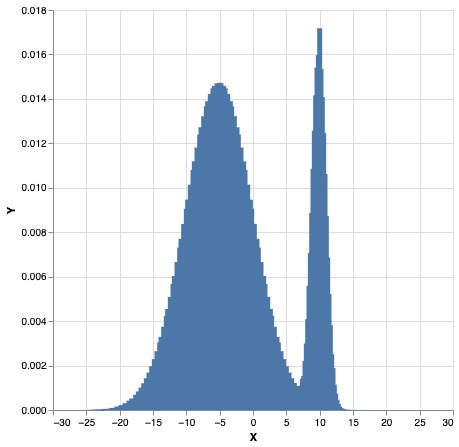

In [85]:
plotVega $ histogram 250 0.2 model

Line 8: Redundant bracket
Found:
(model2)
Why not:
model2

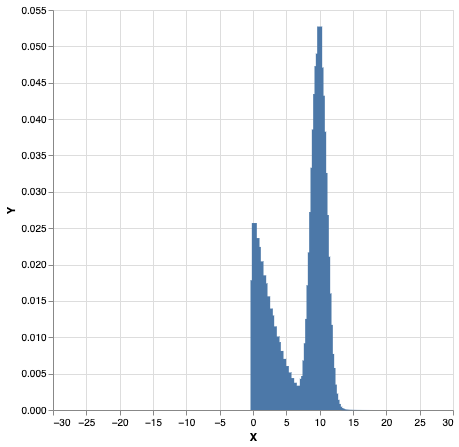

In [56]:
model2 :: Measure Real
model2 = do
    p <- bernoulli 0.2
    x <- if p then normal 10 1 else normal (-5) 5
    condition (x > 0)
    return x

plotVega $ histogram 250 0.2 ( model2)